# Trabajo Práctico 1 : Reservas de Hotel

<hr width="50%" align="left"/>

<br/>

## **Grupo:** 03 - ***"Hackers Panas"***

<br/>

## **Integrantes:**

* ### Franco Lighterman Reismann (106714)
* ### Marcos García Neira (110363)
* ### Martín Andrés Maddalena (107610)

<br/><br/><br/><br/>
<hr/>

### **_imports_ de librerías:**

Acá importamos todas las librerías para mantener los `import` juntos en un lugar.

In [227]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display # a veces va a ser preferible a print()

<hr width="50%" align="left"/>

## **Análisis Exploratorio y Preprocesamiento de Datos**

Primero importemos el dataset en cuestión.

In [228]:
# damos por hecho que la notebook se para una carpeta más arriba que los datasets
original = pd.read_csv("./Datasets/hotels_train.csv")
df_trabajo = original.copy()
df_trabajo.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


#### **Exploración Inicial:**

Se ven las siguientes variables:

In [229]:
print(f"\nCantidad de columnas: {len(df_trabajo.columns)}")
df_trabajo.columns


Cantidad de columnas: 31


Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled'],
      dtype='object')

| Tipo de Variable |  Símbolo  |
|:----------------:|:---------:|
|Categórica/Cualitativa|   ★  |
|Cuasicuantitativa/Ordinal|♦   |
|Cuantitativa Discreta|    ♣   |
|Cuantitativa Continua|    ♠   |

<br/><hr width="25%" align="left" /><br/>

* **★ hotel:** El tipo de hotel al que la reserva se le atribuye. Las reservas ocurren en dos hoteles:
`"Resort Hotel"` y `"City Hotel"`.

* **♣ lead_time:** Los días que pasan desde que se hace la reserva hasta que el cliente efectivamente llega al hotel.

* **♣ arrival_date_year:** El año de llegada, en su representación decimal.

* **★ arrival_date_month:** El nombre de mes de llegada.

* **♣ arrival_date_week_number:** El número de semana de llegada.

* **♣ arrival_date_day_of_month:** Número del día del mes en que ocurrió la llegada.

* **♣ stays_in_weekend_nights:** Número de noches reservadas/estadías en fines de semana (Sábado-Domingo).

* **♣ stays_in_week_nights:** Número de noches reservadas/estadías en días de semana (Lunes a Viernes).

* **♣ adults:** Cantidad de adultos en la reserva.

* **♣ children:** Cantidad de niños en la reserva.

* **♣ babies:** Cantidad de bebés en la reserva.

* **★ meal:** El tipo de comidas pagado en la reserva. Se esperan los siguientes tipos:
    * `Undefined` o `SC`: Sin comida.
    * `BB` _(Bed and Breakfast)_: Sólo desayuno.
    * `HB` _(Half Board)_: Desayuno y otra comida (típicamente la cena).
    * `FB` _(Full Board)_: Desayuno, almuerzo y cena.

<br/>

* **★ country:** País de origen.

* **★ market_segment:** El segmento de mercado.
    * La abreviación `TA` _(travel agents)_ refiere a agencias de viaje; mientras que `TO` _(tour operators)_, a agencias de turismo.

<br/>

* **★ distribution_channel:** Cómo la reserva fue "distribuida" al cliente.

* **★ is_repeated_guest:** Si la reserva es de un cliente previo (`1`) o no (`0`).

* **♣ previous_cancellations:** Cantidad de veces que una reserva previa fue cancelada por el cliente.

* **♣ previous_bookings_not_canceled:** Número de veces que una reserva previa ***no*** fue cancelada por el cliente.

* **★ reserved_room_type:** El tipo de habitación reservada por el cliente.

* **★ assigned_room_type:** El tipo de habitación efectivamente asignada a la reserva.

* **♣ booking_changes:** Cambios hechos a la reserva desde el momento en que fue hecha.

* **★ deposit_type:** Tipo de depósito, para indicar si el cliente garantiza la reserva. Se esperan los tipos:
    * `No Deposit`: No se hizo un depósito.
    * `Non Refund`: Se hizo un depósito igual o mayor al precio de estadía.
    * `Refundable`: Se hizo un depósito menor al precio de estadía.

<br/>

* **★ agent:** El ID de la agencia que hizo la reserva.

* **★ company:** El ID de la compañía que hizo la reserva o que es responsable de su pago.

* **♣ days_in_waiting_list:** Días que la reserva estuvo en espera hasta ser confirmada al cliente.

* **★ customer_type:** Tipo de cliente asociado a la reserva. Se esperan las categorías:
    * `Contract`: Cuando la reserva está ligada a algún tipo de contrato.
    * `Group`: Cuando la reserva está ligada a un grupo.
    * `Transient`: Cuando la reserva es transitoria, y no está ligada a otras reservas transitorias.
    * `Transient-Party`: Cuando la reserva es transitoria, y sí está ligada a otras reservas transitorias.

<br/>

* **♠ adr:** La tasa diara de pagos: la suma total de pagos dividida la cantidad de días de estadía.
             Esto es, un promedio de cuánto pagó el cliente por día.

* **♣ required_car_parking_spaces:** Cuántos espacios de estacionamiento necesita el cliente.

* **♣ total_of_special_requests:** Cantidad de pedidos especiales del cliente.

* **★ id:** El ID de la reserva misma.

* **★ is_canceled:** Si la reserva en cuestión fue cancelada (`1`) o no (`0`).

Para las variables cuantitativas, tratamos de hacer un breve resumen:

In [230]:
# removemos primero las columnas con valores categóricos pero aparentemente numéricos
df_trabajo_cuantitativas = df_trabajo.drop(["agent", "company", "is_repeated_guest", "is_canceled"], axis=1, inplace=False)

# hacemos un resumen con las variables que quedan
df_trabajo_cuantitativas.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.114790,0.115420,0.195952,2.638977,102.383773,0.049957,0.523703
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.993723,1.396359,0.610519,18.619092,47.757640,0.221023,0.775412
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,26.000000,70.000000,17.000000,391.000000,510.000000,8.000000,5.000000


Para las variables cualitativas, vemos con qué frecuencia aparece cada valor en cada caso:

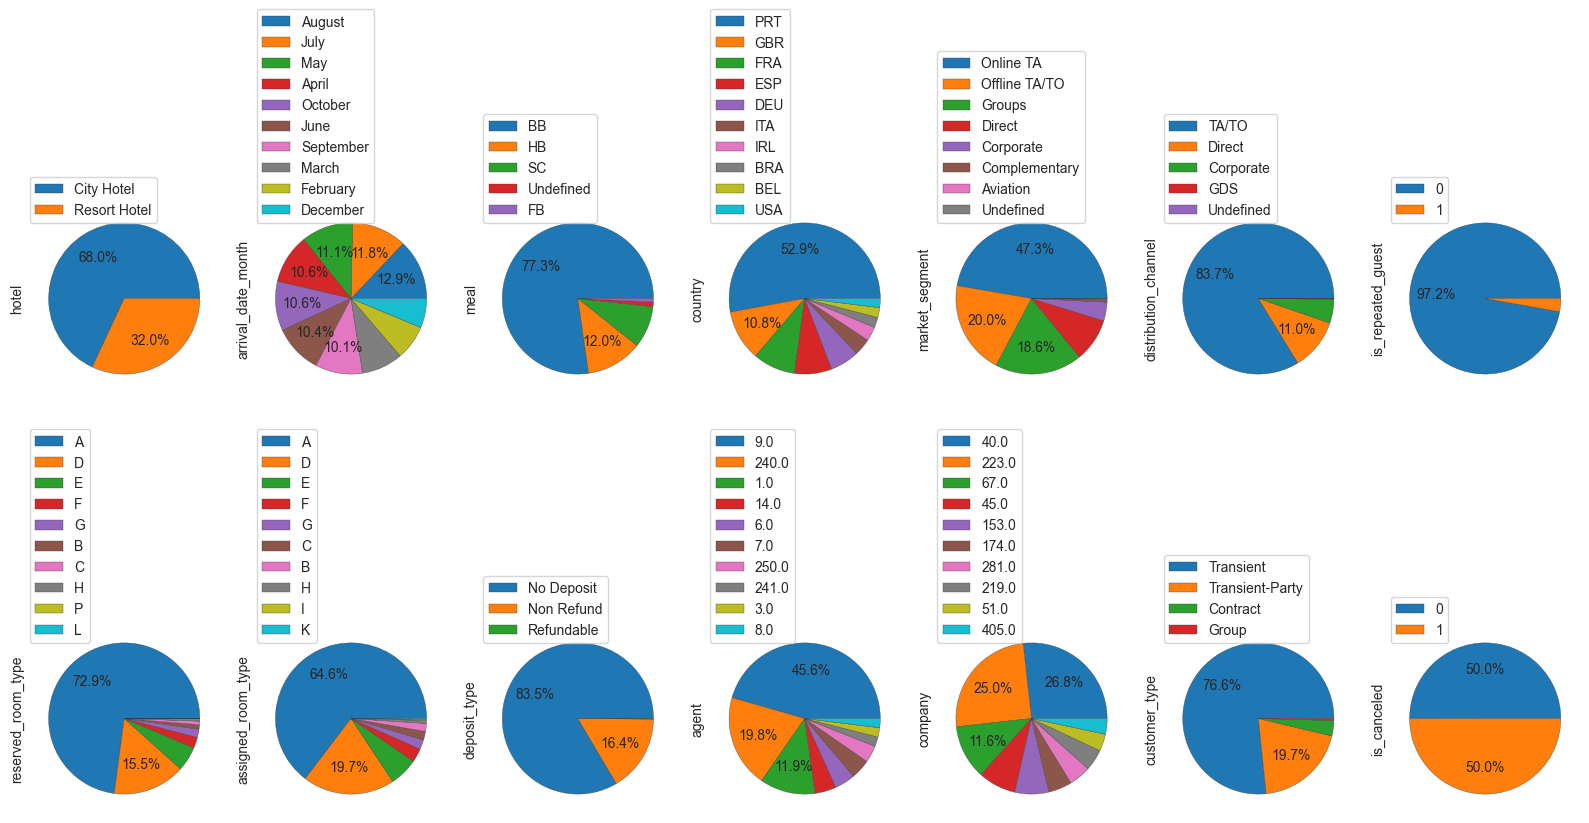

In [231]:
variables_categoricas = ["hotel", "arrival_date_month", "meal", "country", "market_segment", "distribution_channel",
                         "is_repeated_guest", "reserved_room_type", "assigned_room_type", "deposit_type", "agent",
                         "company", "customer_type", "is_canceled"]
limite_valores = 10
limite_porcentaje = 10.0

fig, axes = plt.subplots(nrows=2, ncols=7)
fig.set(figheight=10, figwidth=20) # en pulgadas

for i, categoria in enumerate(variables_categoricas):
    cuenta = df_trabajo[categoria].value_counts().to_frame()
    if len(cuenta) > limite_valores:
        cuenta = cuenta.head(limite_valores)

    ax = cuenta.plot.pie(subplots=True, ylabel=categoria,
                         autopct=(lambda pct: "%1.1f%%" % pct if pct >= limite_porcentaje else ""), # No mostrar porcentajes menores a 10%
                         pctdistance=0.65,
                         wedgeprops={"edgecolor": "#3c3c3c", "linewidth": 0.25},
                         legend=True, labeldistance=None,
                         ax=axes.flat[i])
    ax[0].legend(loc=(0, 0.9)) # 'ax' es, en realidad, un array de un sólo elemento: el 'Axes'

**Nota:** La variable `id` fue intencionalmente dejada de lado pues, si bien es técnicamente categórica, resulta trivial contar las apariciones de valores únicos (pues es esa justamente la tarea de la variable: ser única), e "inflaría" inútilmente los datos a mostrar. <br/>
Si acaso, podemos verificar rápidamente que no hay duplicados *en esa columna*. 

In [232]:
ids = df_trabajo["id"].value_counts().reset_index()
display(ids.isna().sum())
ids[ids["count"] != 1]

id       0
count    0
dtype: int64

,id,count


Y como se puede observar, la tabla está vacía porque no hay conteo de valor único donde no se anote exactamente `1`. Es decir, no hay IDs duplicados. <br/>
Tampoco hay valores nulos que podrían no haberse tomado en cuenta para el cálculo.

<hr width="20%" align="left" />

Comprobamos a continuación la correlación entre las variables numéricas:

<Axes: >

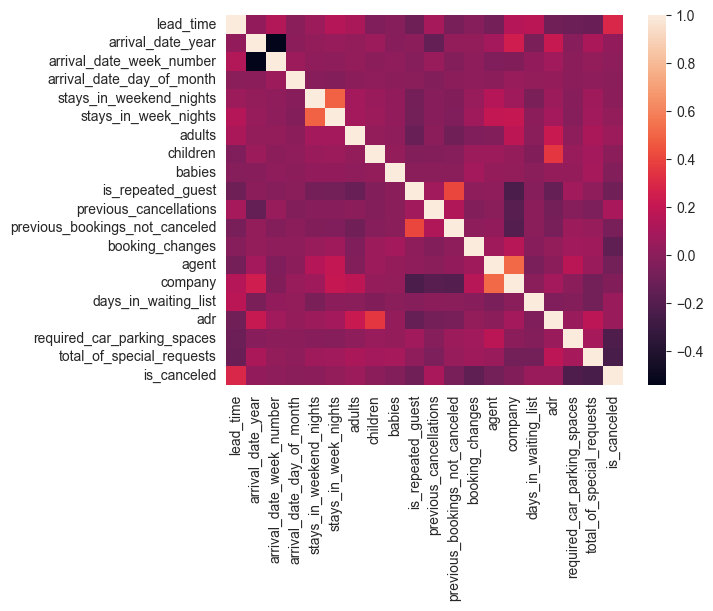

In [233]:
correlaciones = df_trabajo.corr(numeric_only=True)
sns.heatmap(correlaciones)

#### **Datos faltantes:**

In [234]:
df_columnas_con_nulos = df_trabajo.copy()
variables = df_columnas_con_nulos.columns
total = len(df_columnas_con_nulos.index)

for var in variables:
    cant_nulos = df_columnas_con_nulos[var].isna().sum()
    if cant_nulos == 0:
        df_columnas_con_nulos.drop(var, axis=1, inplace=True)

df_columnas_con_nulos.head(10)

,children,country,agent,company
0,0.0,USA,9.0,NaN
1,0.0,PRT,NaN,NaN
2,2.0,CHE,9.0,NaN
3,0.0,PRT,154.0,NaN
4,0.0,FRA,20.0,NaN
5,0.0,AGO,NaN,NaN
6,0.0,FRA,314.0,NaN
7,0.0,PRT,9.0,NaN
8,0.0,GBR,9.0,NaN
9,0.0,PRT,240.0,NaN


`children`, `country`, `agent` y `company` son las únicas categorías que tienen al menos un valor nulo en su columna.

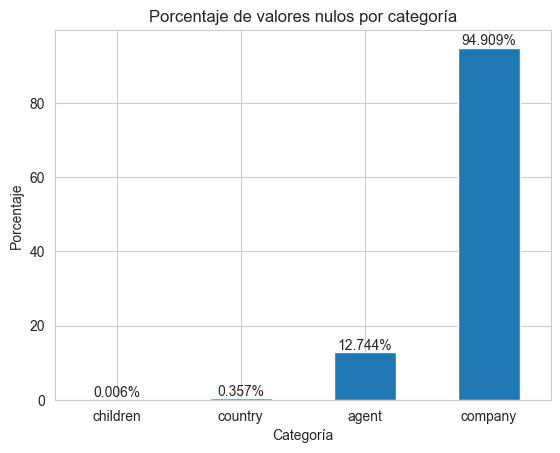

In [235]:
serie_col_con_nulos = df_columnas_con_nulos.isna().sum() / len(df_columnas_con_nulos.index) * 100

sns.set_style("whitegrid")
ax = serie_col_con_nulos.plot.bar(title="Porcentaje de valores nulos por categoría",
                                  xlabel="Categoría", ylabel="Porcentaje", rot=0.0)
for cont in ax.containers:
    ax.bar_label(container=cont, fmt="%1.3f%%")

`company` tiene una cantidad considerable de datos faltantes, lo suficiente como para tampoco poder inferir qué valores podrían tomar, por lo que eliminamos esa columna del dataframe. <br/>
`children` y `country` parecen ser valores tan bajos como para decir que el aporte de las filas aceptadas es despreciable: eliminamos esas filas específicas.

* **TODO:** _(Considerar hacer imputaciones con_ `agent` _)_

In [236]:
df_sanitizada = df_trabajo.drop(columns=["company"]).dropna(axis="index", subset=["children", "country"])

<hr width="10%" align="left" />

En otra situación particular, notamos el conteo de valores de `adults`:

In [237]:
df_sanitizada["adults"].value_counts().sort_index()

adults
0       192
1     11427
2     46869
3      3159
4        30
5         2
6         1
10        1
20        1
26        3
27        1
40        1
55        1
Name: count, dtype: int64

Hay entradas en las hay `0` adultos en la reserva; esto lo consideramos un error. También parece curioso reservas de 40 o 55 personas adultas a la vez. <br/>
Como cada "reserva" en los datos parece ser equivalente a una habitación _(el razonamiento, veremos, está más adelante)_, consideramos como válida una cantidad de personas (`adults` + `children` + `babies`) que el sentido común nos dice es viable que habiten cómodamente dicha habitación. <br/>
Podemos, de hecho, crear una nueva columna para ayudar con ese análisis.

In [238]:
var_gente = "people"

personas = (df_sanitizada["adults"] + df_sanitizada["children"] + df_sanitizada["babies"]).astype(int)

if var_gente not in df_sanitizada.columns: # agregar sólo una vez
    df_sanitizada.insert(11, var_gente, personas)

# aprovechamos para cambiar el dtype de 'children': no tiene sentido que sea un float
df_sanitizada["children"] = df_sanitizada["children"].astype(int)

df_sanitizada[["adults", "children", "babies", "people"]].head(10)

,adults,children,babies,people
0,1,0,0,1
1,2,0,0,2
2,2,2,0,4
3,2,0,0,2
4,2,0,0,2
5,1,0,0,1
6,2,0,0,2
7,2,0,0,2
8,2,0,0,2
9,2,0,0,2


_(_ `children` _era de tipo float y por lo tanto lo convertimos a entero: conceptualmente no tiene sentido tener "2 niños y medio". Fuera de eso, no había datos mal ingresados: terminaban todos en '.0', y el problema era de un casteo innecesario.)_

Así pues, tenemos una variable con la que imaginar el cálculo: podemos ver cuáles son los valores más comunes.

In [239]:
df_sanitizada["people"].value_counts().sort_index()

people
0        71
1     11213
2     42969
3      5240
4      2106
5        78
6         1
10        2
12        1
20        1
26        3
27        1
40        1
55        1
Name: count, dtype: int64

Efectivamente, `5` parece ser el número sensiblemente razonable más alto de personas que alojar en una habitación, y que tiene además cantidad apreciable de entradas. Es así pues, que consideramos tratar cualquier otro caso. <br/>

Cabe aclarar las siguientes consideraciones:

* **1. Cada reserva tiene en cuenta que le es asignada una y sólo una habitación.** Inferimos de los demás datos, como el tipo de habitación (no "tipos") en `reserved_room_type` y `assigned_room_type`, que cada reserva parece estar relacionada no más de una habitación. Si un cliente desea más habitaciones, quedarían internamente en el dataset como reservas separadas. <br/>

    - **1.1. Esto parece quedar evidenciado** con la variable `customer_type`, donde uno de sus posibles valores es `Transient-Party`: estarían ligadas a otras reservas del mismo tipo, lo que hace pensar que si el cliente es un grupo de varias personas, el sistema los guarda como reservas distintas.

<br/>

* **2. Cada habitación abarca como máximo 5 personas, no más.** Desconocemos los detalles de las habitaciones (pues se expresan con letras para mantener el anonimato), pero siguiendo la lógica del punto **1**, si vemos que en una reserva hay un número de personas mayor a 5, lo entenderemos como que pretenden habitar todos a la vez esa misma habitación. Eso no lo consideramos posible.

* **3. Las personas que van a parar a una habitación, de ser parte de un grupo familiar, comparten todos el mismo cuarto.** Esto parece similar a la consideración de **1.1**, pero imaginemos: no es impensable que una misma familia reserve 2 habitaciones, fuera la cantidad de padres más hijos excedente a 5. De ésto inferimos dos posibilidades:

    - **A)** Se reparten de manera que hay al menos un adulto por habitación (una con el padre y los hijos varones, y la otra con la madre y las hijas, por ejemplo).<br/>
    Ésto conforme al punto **1** serían dos reservas distintas para empezar.

    - **B)** Los padres en una habitación y los hijos en otra. Esto da la ilusión de que serviría como una explicación para las entradas de `0` adultos (pues internamente son reservas distintas), pero surgen problemas como que los demás datos parecerían atribuir a menores características extrañas (como la tasa diaria de pagos `adr`). Aún en el improbable caso en que hiciéramos coincidir datos con la reserva de los padres, sólo lograríamos infectar al dataset con datos confusos. <br/>
    Se sobrentiende que además no es de sentido común dejar a menores solos.

Siguiendo lo antepuesto, resulta inmediata la resolución de tratar las entradas con `0` adultos.

In [244]:
df_sanitizada["adults"].value_counts().sort_index() / len(df_sanitizada.index) * 100

adults
0      0.311244
1     18.523862
2     75.977500
3      5.120931
4      0.048632
5      0.003242
6      0.001621
10     0.001621
20     0.001621
26     0.004863
27     0.001621
40     0.001621
55     0.001621
Name: count, dtype: float64

Y la cantidad de entradas con `0` adultos es menor al 1%. Consideramos borrar directamente las filas afectadas.

In [260]:
valores_indeseados = [0]

for valor in valores_indeseados:
    if df_sanitizada["adults"][df_sanitizada["adults"] == valor].count() != 0: # Sólo borrar una vez, no hacer nada en subsecuentes ejecuciones
        filas_a_borrar = df_sanitizada[df_sanitizada["adults"] == valor].index
        df_sanitizada.drop(filas_a_borrar, inplace=True)